In this example, we will use the multicell module to simulate the self-organization of a geometrical Turing pattern, based on equations developed by Gierer and Meinhardt.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 20, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (1.12 s)


## Biological species

In [4]:
sim.register_cell_variable("a")
sim.register_cell_variable("h")

## Computed variables

In [5]:
def c_a2(c_a, **kwargs):
    return c_a**2

sim.register_computed_variable("c_a2", c_a2)

## Constants

In [6]:
sim.set_constants({"mu_a": 1e-1, "mu_h": 2e-1, "rho_a": 1., "rho_h": 1., "q": 1., "H": 0.35, "A": 0., "D_h": 5., "D_a": 0.025})

## Differential equations

In [7]:
def da_dt(simulation, a, c_a, c_a2, c_h, D_a, mu_a, rho_a, A, q, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) + rho_a * c_a2 / c_h / (1 + q**2 * c_a2) - mu_a * a + A


def dh_dt(simulation, h, c_a2, c_h, D_h, mu_h, rho_h, H, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_h, c_h, adjacency_matrix) + rho_h * c_a2 - mu_h * h + H

sim.set_ODE("a", da_dt)
sim.set_ODE("h", dh_dt)

In [8]:
sim.initialize_cell_variables()

a0 = np.random.uniform(0.28, 0.31, sim.n_cells)
h0 = np.random.uniform(4.37, 4.43, sim.n_cells)

sim.set_cell_variable("a", a0)
sim.set_cell_variable("h", h0)

## Duration

In [9]:
sim.set_duration(1e7)

## Tissue growth

In [10]:
sim.enable_growth(n_steps=11)
sim.register_growth_method(multicell.growth.linear_growth, {"coefficient": [1.1, 1.05, 1.]})

## Cell divisions

In [11]:
sim.enable_division(contraction=0)
sim.register_division_method(multicell.division.symmetrical_division)
sim.register_division_trigger(multicell.division.volume_trigger, {"volume_threshold": 2.})

## Dilution volumes

In [12]:
#sim.register_dilution_volume_function(multicell.dilution.constant_volume, {"value": 1.})

## Rendering

In [13]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 1.2, "view_size": 60, "view": (90, -90), "axes": False})

# Visualization of the initial state

<IPython.core.display.Javascript object>


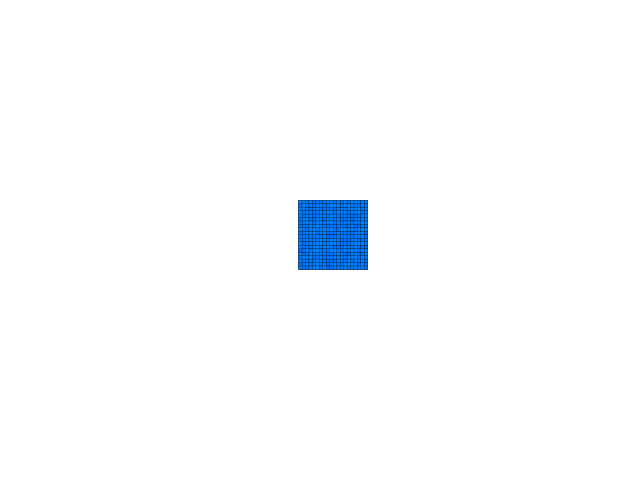

Time: 0.0
c_a: from 0.280013674934 to 0.309858665245
c_h: from 4.36919560617 to 4.43115858044


In [14]:
sim.renderer.display("c_a")

# Simulation

Growth step #0
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Integration of the ODE system: 34.0605578423 seconds
Growth of the tissue: 1.21392703056 seconds
Cell divisions: 1.31799817085 seconds


<IPython.core.display.Javascript object>


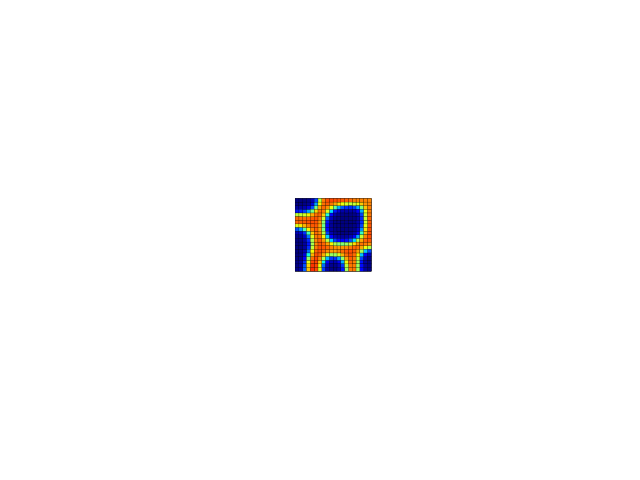

Time: 909090.909091
c_a: from 0.000460572979064 to 1.0332126795
c_h: from 3.3173167639 to 4.33070836782
Growth step #1
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Integration of the ODE system: 7.19299197197 seconds
Growth of the tissue: 1.10261011124 seconds
Cell divisions: 1.27086091042 seconds


<IPython.core.display.Javascript object>


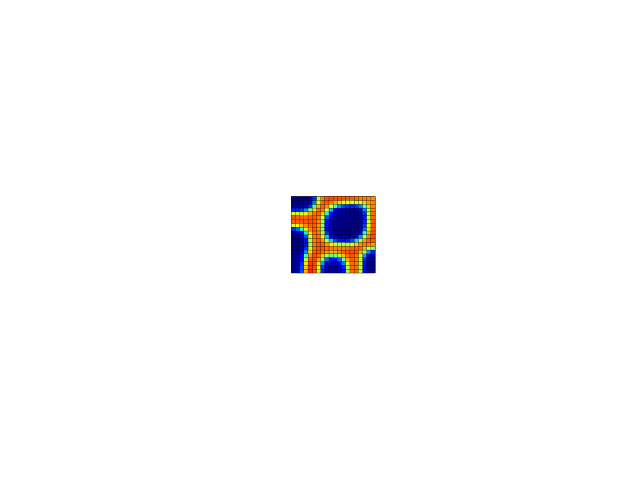

Time: 1818181.81818
c_a: from 0.000360703493786 to 1.03932952993
c_h: from 2.84000578199 to 3.75338730159
Growth step #2
Jacobian computation: started
Jacobian computation: finished (0.06 s)
Integration of the ODE system: 8.55989384651 seconds
Growth of the tissue: 1.104804039 seconds
Cell divisions: 1.31450510025 seconds


<IPython.core.display.Javascript object>


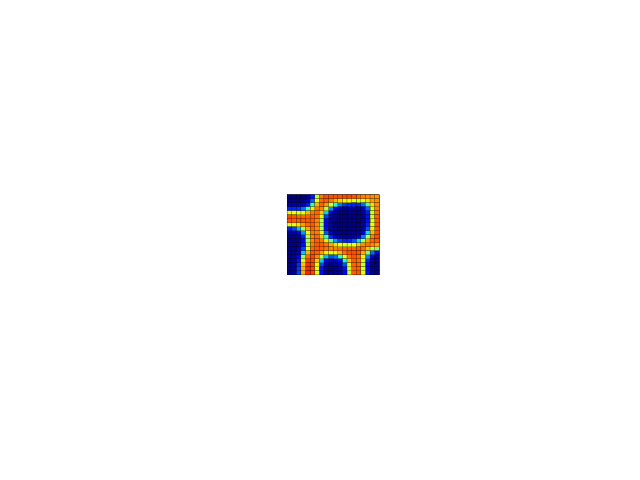

Time: 2727272.72727
c_a: from 0.000305489586512 to 1.04614419384
c_h: from 2.43132287924 to 3.25278275074
Growth step #3
Jacobian computation: started
Jacobian computation: finished (0.05 s)
Integration of the ODE system: 6.84900212288 seconds
Growth of the tissue: 1.13951086998 seconds
Cell divisions: 1.31082987785 seconds


<IPython.core.display.Javascript object>


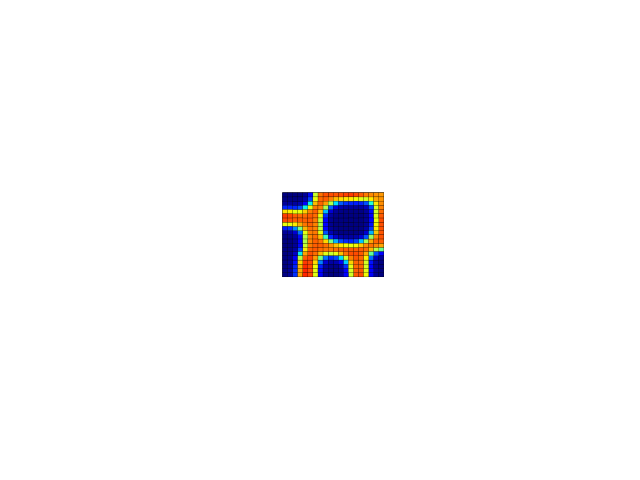

Time: 3636363.63636
c_a: from 0.000230946890213 to 1.04496183793
c_h: from 2.0778257785 to 2.81839196039
Growth step #4
Jacobian computation: started
Jacobian computation: finished (0.04 s)
Integration of the ODE system: 11.0305790901 seconds
Growth of the tissue: 1.14846396446 seconds
Cell divisions: 7.02280688286 seconds


<IPython.core.display.Javascript object>


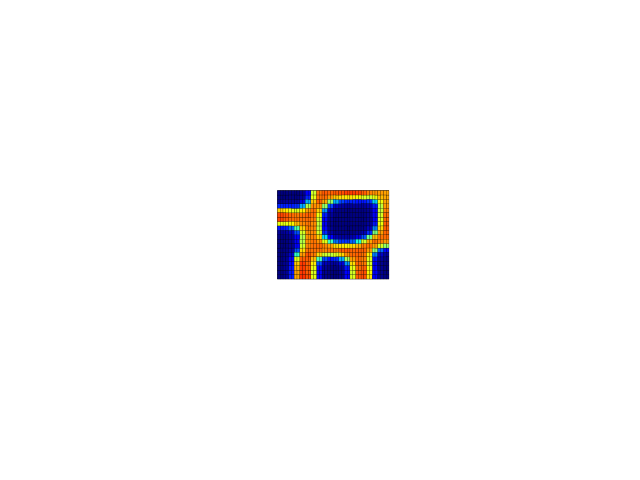

Time: 4545454.54545
c_a: from 0.000197782698703 to 1.02966684083
c_h: from 1.75003151065 to 2.41618375601
Growth step #5
Jacobian computation: started
Jacobian computation: finished (0.13 s)
Integration of the ODE system: 59.1679039001 seconds
Growth of the tissue: 2.93270897865 seconds
Cell divisions: 3.76496887207 seconds


<IPython.core.display.Javascript object>


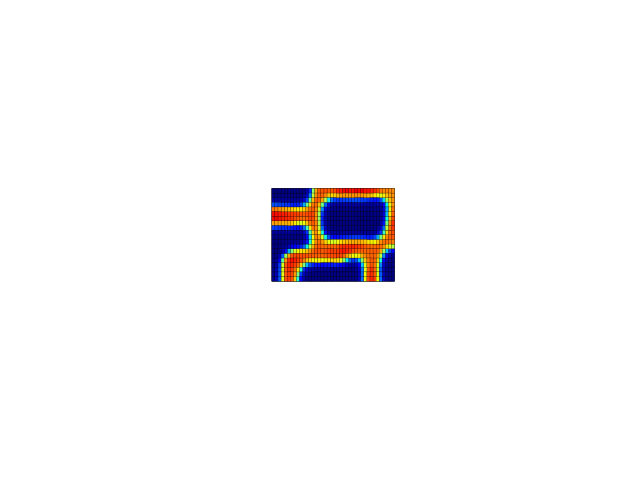

Time: 5454545.45455
c_a: from 0.000183124764241 to 1.08832033219
c_h: from 2.87111633502 to 4.17435087358
Growth step #6
Jacobian computation: started
Jacobian computation: finished (0.12 s)
Integration of the ODE system: 19.4429950714 seconds
Growth of the tissue: 2.85324311256 seconds
Cell divisions: 3.63984107971 seconds


<IPython.core.display.Javascript object>


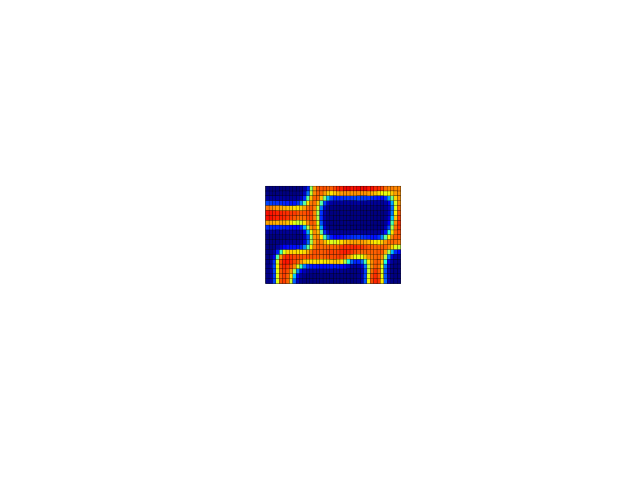

Time: 6363636.36364
c_a: from 0.00014940170803 to 1.08689629732
c_h: from 2.45619673727 to 3.61539540142
Growth step #7
Jacobian computation: started
Jacobian computation: finished (0.13 s)
Integration of the ODE system: 17.6800129414 seconds
Growth of the tissue: 2.92450213432 seconds
Cell divisions: 3.72265720367 seconds


<IPython.core.display.Javascript object>


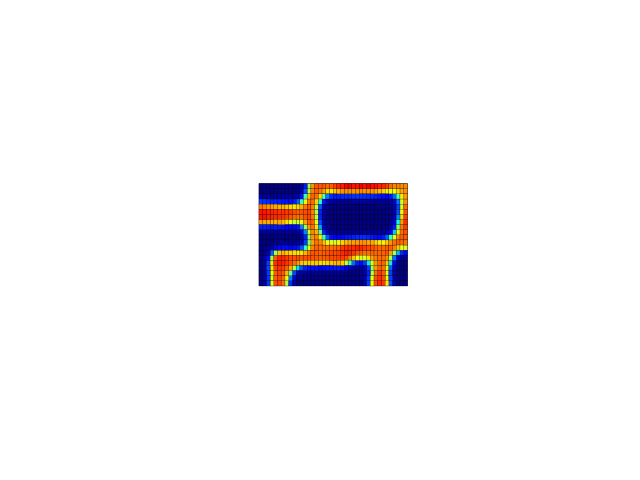

Time: 7272727.27273
c_a: from 0.000122124052435 to 1.08460293247
c_h: from 2.09989747049 to 3.13296027872
Growth step #8
Jacobian computation: started
Jacobian computation: finished (0.13 s)
Integration of the ODE system: 18.8925027847 seconds
Growth of the tissue: 2.84788680077 seconds
Cell divisions: 3.63443613052 seconds


<IPython.core.display.Javascript object>


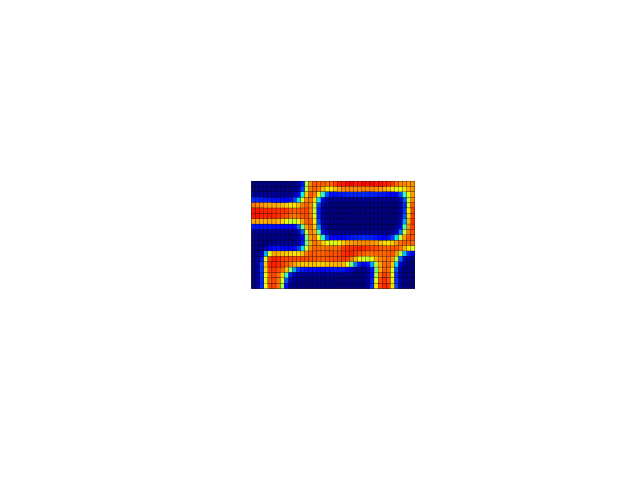

Time: 8181818.18182
c_a: from 9.90870735911e-05 to 1.0815747633
c_h: from 1.79470386534 to 2.71486288503
Growth step #9
Jacobian computation: started
Jacobian computation: finished (0.13 s)
Integration of the ODE system: 17.532651186 seconds
Growth of the tissue: 2.85399913788 seconds
Cell divisions: 16.9411489964 seconds


<IPython.core.display.Javascript object>


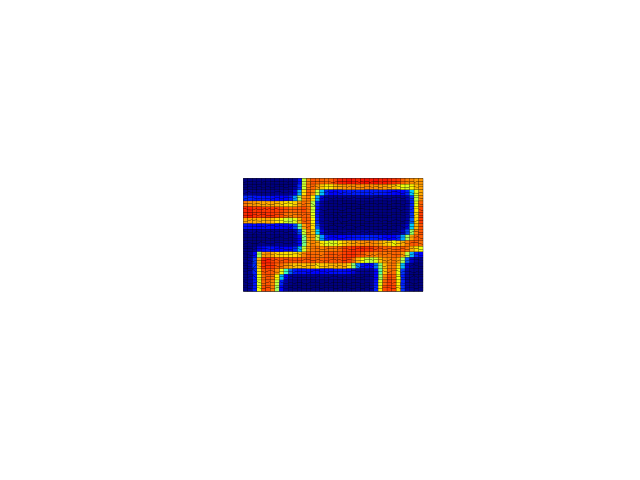

Time: 9090909.09091
c_a: from 8.0236738459e-05 to 1.07257471153
c_h: from 1.45908437946 to 2.32811068343
Growth step #10
Jacobian computation: started
Jacobian computation: finished (0.38 s)
Integration of the ODE system: 200.012957096 seconds
Growth of the tissue: 6.10742712021 seconds
Cell divisions: 9.82547712326 seconds


<IPython.core.display.Javascript object>


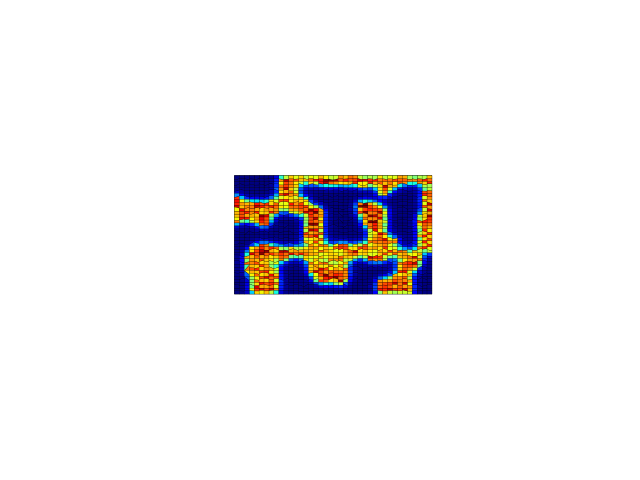

Time: 10000000.0
c_a: from 8.65973065887e-06 to 1.33574054931
c_h: from 2.47297115638 to 4.12630468418


In [15]:
sim.simulate()

We can see that as the tissue grows and the cells divide, new ridges of activator engulf into the valleys widened by growth.

Cell divisions do not directly trigger the reorganization of the pattern, because the spatial distribution of chemical species does not actually change (new cells have the same concentrations as former cells and occupy the same space). However, cell divisions modify how far the inhibitor can reach, relatively to the pattern previously achieved. Where it cannot reach, the activator starts being expressed. 